In [1]:
import pandas as pd                    
import numpy as np                          
import matplotlib.pyplot as plt            
import seaborn as sns                
from scipy.stats import norm              
import scipy.stats as stats               
import warnings                             
warnings.filterwarnings('ignore')          
import matplotlib as mpl                    
from tabulate import tabulate as tab        

In [3]:
df=pd.read_csv("DS1_C5_S5_Hotel Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


TASK 1

In [10]:
print(df.shape)
print(df.info())
print(df.columns)
print(df.isnull().sum())

(2097, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                   

In [16]:
numlist=list(df.select_dtypes(exclude='object'))
print("Numerical columns in list:\n",nlist)
print("---------------------------------------------")
catlist=list(df.select_dtypes(include='object'))
print("Categorical columns in list:\n",clist)

Numerical columns in list:
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
---------------------------------------------
Categorical columns in list:
 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [24]:
from tabulate import tabulate

# Create table from lists
table = list(zip(catlist, numlist))

# Print table with headers
print(tabulate(table, headers=['Categorical', 'Numerical']))

Categorical              Numerical
-----------------------  -------------------------
hotel                    is_canceled
arrival_date_month       lead_time
meal                     arrival_date_year
country                  arrival_date_week_number
market_segment           arrival_date_day_of_month
distribution_channel     stays_in_weekend_nights
reserved_room_type       stays_in_week_nights
assigned_room_type       adults
deposit_type             children
customer_type            babies
reservation_status       is_repeated_guest
reservation_status_date  previous_cancellations


In [30]:
def find(c):
    print(f"No of unique values for column {c} are:{df[c].nunique()}")
    print(f"Most occured values(mode) for column {c} is: {df[c].mode()}")
    m=df[c].isnull().sum()
    print(f"No of missing values for column {c} are:{m}")
    """if(m>0):
        df[c]=hb[c].fillna(df[c].mode()[0])
        print("Acknowledge : imputed missing values successfully")
        print(f"After imputing the missing values missing values count is:{df[c].isnul().sum()}")"""
    print("----------------------------------------------------------------------------")

for i in df.columns:
    find(i)

No of unique values for column hotel are:2
Most occured values(mode) for column hotel is: 0    City Hotel
Name: hotel, dtype: object
No of missing values for column hotel are:0
----------------------------------------------------------------------------
No of unique values for column is_canceled are:2
Most occured values(mode) for column is_canceled is: 0    0
Name: is_canceled, dtype: int64
No of missing values for column is_canceled are:0
----------------------------------------------------------------------------
No of unique values for column lead_time are:263
Most occured values(mode) for column lead_time is: 0    0
Name: lead_time, dtype: int64
No of missing values for column lead_time are:0
----------------------------------------------------------------------------
No of unique values for column arrival_date_year are:3
Most occured values(mode) for column arrival_date_year is: 0    2016
Name: arrival_date_year, dtype: int64
No of missing values for column arrival_date_year are:

TASK 2 -1

<Figure size 1000x600 with 0 Axes>

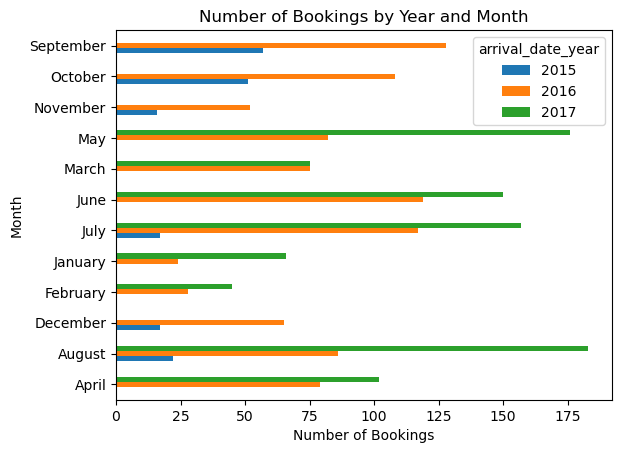

In [37]:
month = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='booking_count')
#print(month)
plt.figure(figsize=(10,6))
month.pivot_table(index='arrival_date_month', columns='arrival_date_year', values='booking_count').plot(kind='barh')
plt.title('Number of Bookings by Year and Month')
plt.gca()
plt.ylabel('Month')
plt.xlabel('Number of Bookings')
plt.show()

INTERPRETATION :

 In year 2015 & 2016 the month september has the highest number of booking made by the customers, where as in year 2017 the august month has the highest number of bookings.

TASK 2 - 2

In [41]:
chb=df[df['is_canceled']==1]
chb

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
28,Resort Hotel,1,44,2016,May,19,6,2,3,2,...,No Deposit,240.0,NaN,0,Transient,95.0,0,0,Canceled,23-03-2016
29,Resort Hotel,1,54,2016,May,20,13,0,1,2,...,No Deposit,240.0,NaN,0,Transient,86.0,0,0,Canceled,29-03-2016
30,Resort Hotel,1,46,2016,May,22,22,1,0,1,...,No Deposit,240.0,NaN,0,Transient,90.0,0,0,Canceled,05-05-2016
31,Resort Hotel,1,18,2016,May,22,27,0,2,2,...,No Deposit,240.0,NaN,0,Transient,139.0,0,1,Canceled,14-05-2016
32,Resort Hotel,1,18,2016,May,22,27,0,2,2,...,No Deposit,240.0,NaN,0,Transient,145.0,0,1,Canceled,14-05-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,City Hotel,1,33,2017,August,35,27,2,1,3,...,No Deposit,9.0,NaN,0,Transient,223.0,0,0,Canceled,17-08-2017
968,City Hotel,1,305,2017,August,35,28,1,2,2,...,No Deposit,9.0,NaN,0,Transient,107.1,0,2,Canceled,12-07-2017
969,City Hotel,1,47,2017,August,35,30,0,2,3,...,No Deposit,9.0,NaN,0,Transient,210.0,0,3,Canceled,21-07-2017
970,City Hotel,1,68,2017,August,35,31,0,2,2,...,No Deposit,9.0,NaN,0,Transient,129.0,0,1,Canceled,27-06-2017


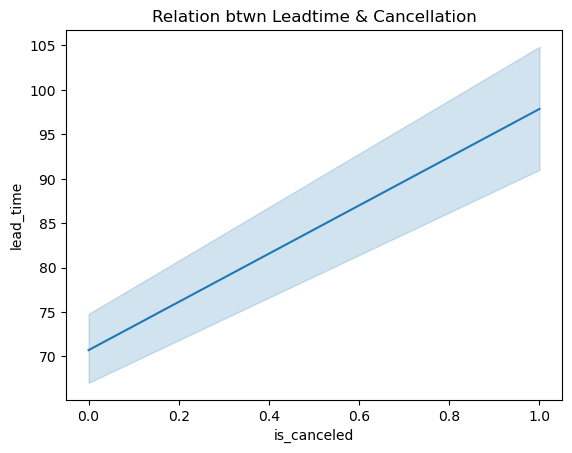

In [49]:
lc=chb['is_canceled'].corr(chb['lead_time'])
lc
sns.lineplot(x='is_canceled',y='lead_time',data=df)
plt.gca()
plt.title("Relation btwn Leadtime & Cancellation")
plt.show()

INTERPRETATION :

 The cancellation by the customersis increasing when lead time increasing.

TASK 2 - 3

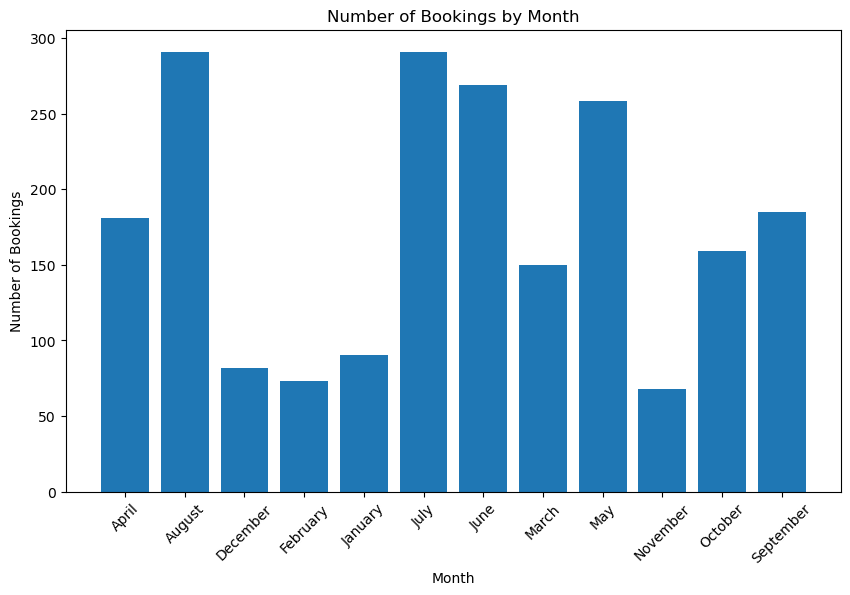

In [55]:
booking_by_month =df.groupby('arrival_date_month').size().reset_index(name='booking_count')
plt.figure(figsize=(10, 6))
plt.bar(booking_by_month['arrival_date_month'], booking_by_month['booking_count'])
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

INTERPRETATIONS :
  The booking was high in the summer season, where most of the people goes for vaction on month may to august , mostly booked on July & August

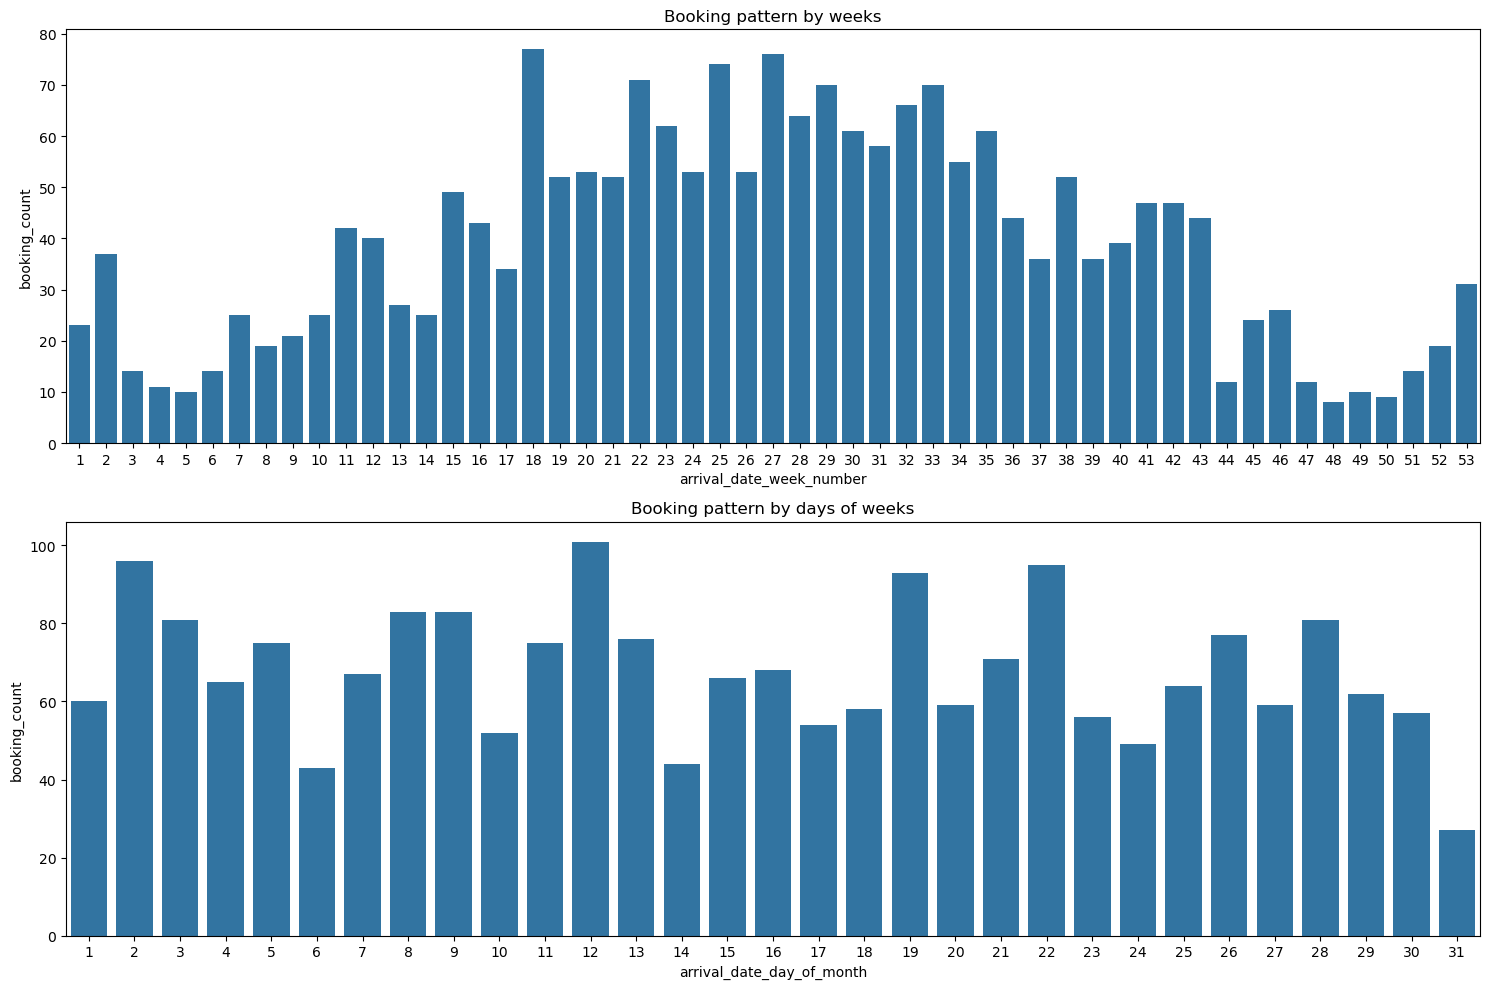

In [58]:
week = df.groupby('arrival_date_week_number').size().reset_index(name='booking_count')
day = df.groupby('arrival_date_day_of_month').size().reset_index(name='booking_count')
figure,ax=plt.subplots(2,1,figsize=(15,10))
sns.barplot(ax=ax[0],x='arrival_date_week_number',y='booking_count',data=week)
ax[0].set_title("Booking pattern by weeks")
ax[0]
sns.barplot(ax=ax[1],x='arrival_date_day_of_month',y='booking_count',data=day)
ax[1].set_title("Booking pattern by days of weeks")
ax[1]
plt.tight_layout()
plt.show()

INTERPRETATION :

 In week 18 & date 12 has thehighest booking count made by the customers

In [63]:
df['arrival_date_month']

0         July
1         July
2         July
3         July
4         July
         ...  
2092    August
2093    August
2094    August
2095    August
2096    August
Name: arrival_date_month, Length: 2097, dtype: object

TASK 3 - 1

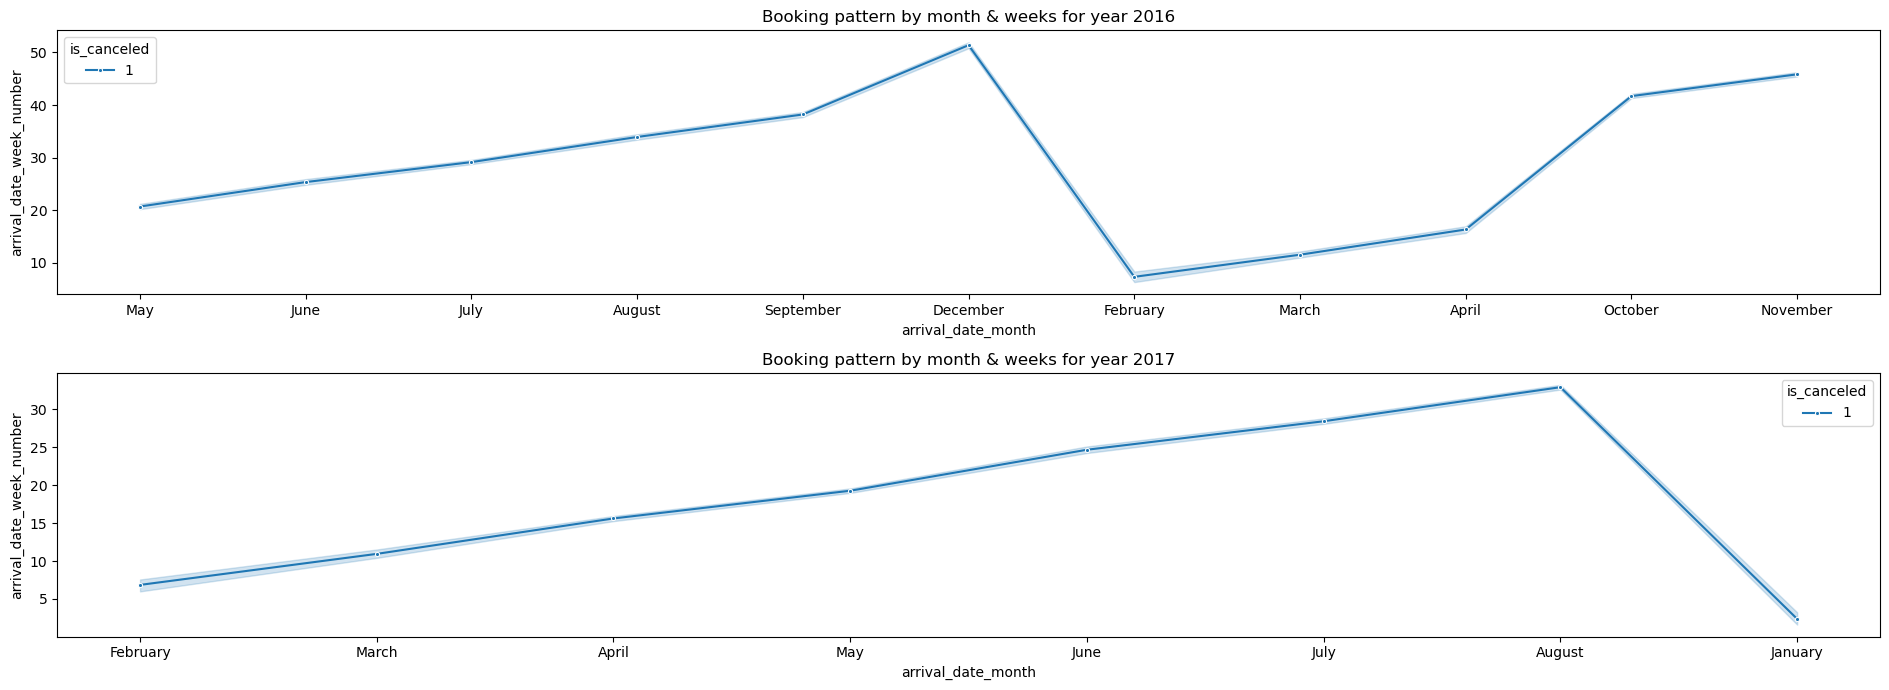

In [66]:
year15=chb[chb['arrival_date_year']==2015]
year15

year16=chb[chb['arrival_date_year']==2016]
year16

year17=chb[chb['arrival_date_year']==2017]
year17

fig,ax=plt.subplots(2,1,figsize=(19,7))
sns.lineplot(ax=ax[0],x='arrival_date_month',y='arrival_date_week_number',hue='is_canceled',data=year16,marker='.')
ax[0].set_title("Booking pattern by month & weeks for year 2016")
ax[0]
sns.lineplot(ax=ax[1],x='arrival_date_month',y='arrival_date_week_number',hue='is_canceled',data=year17,marker='.')
ax[1].set_title("Booking pattern by month & weeks for year 2017")
ax[1]
plt.tight_layout()
pt.show()

In [71]:
df["arrival_date_month"]

0         July
1         July
2         July
3         July
4         July
         ...  
2092    August
2093    August
2094    August
2095    August
2096    August
Name: arrival_date_month, Length: 2097, dtype: object

INTERPRETATION :

In year 2016 & 2017 there is a steady growth in hotel booking cancellation from january to december

TASK 4 -1

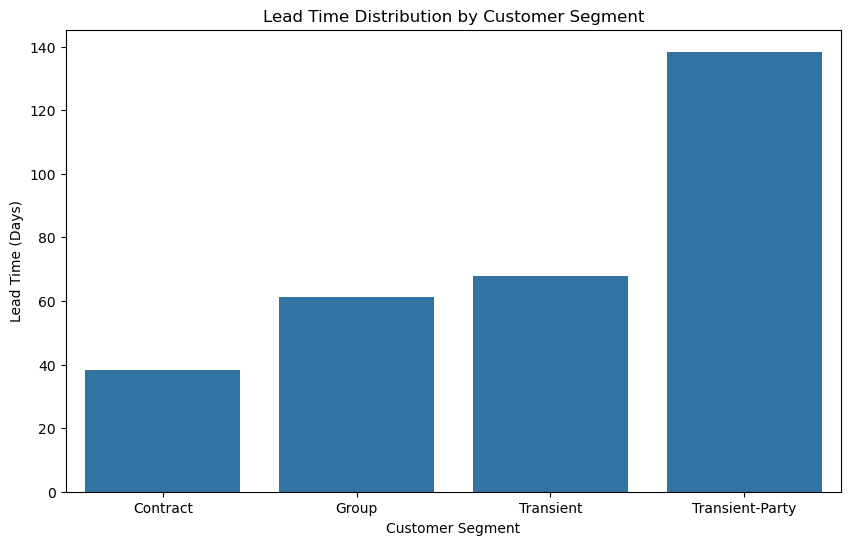

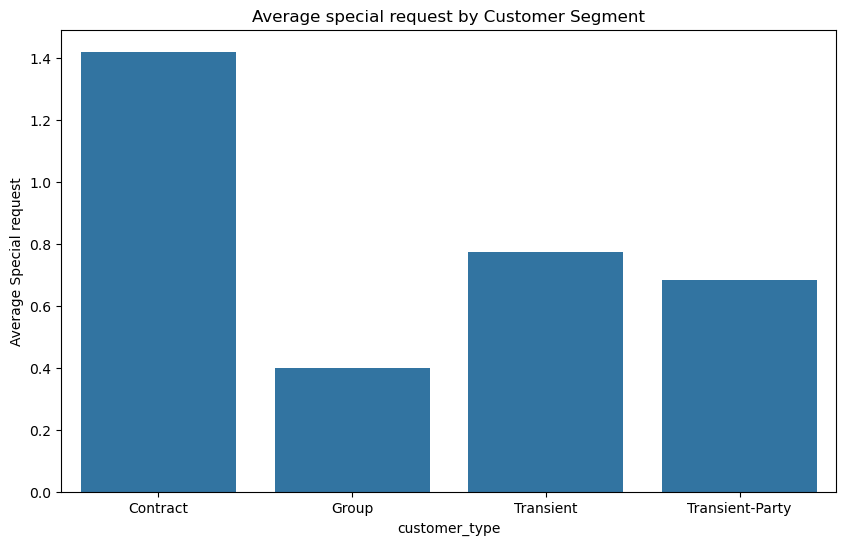

<Figure size 1000x600 with 0 Axes>

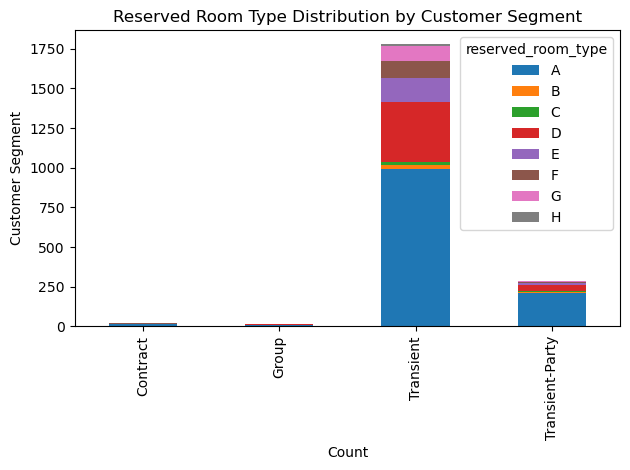

In [77]:
g = df.groupby('customer_type').agg({'lead_time': 'mean','total_of_special_requests': 'mean'})
plt.figure(figsize=(10, 6))
sns.barplot(x=g.index,y=g['lead_time'])
plt.title('Lead Time Distribution by Customer Segment')
plt.gca()
plt.xlabel('Customer Segment')
plt.ylabel('Lead Time (Days)')
plt.show()


#Bar chart for special request
plt.figure(figsize=(10, 6))
sns.barplot(x=g.index,y='total_of_special_requests', data=g)
plt.title('Average special request by Customer Segment')
plt.xlabel('customer_type')
plt.ylabel('Average Special request')
plt.gca()
plt.show()

#Bar chart for reservation type
room_type_counts = df.groupby('customer_type')['reserved_room_type'].value_counts().unstack()
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', stacked=True)
plt.title('Reserved Room Type Distribution by Customer Segment')
plt.xlabel('Count')
plt.ylabel('Customer Segment')
plt.gca()
plt.tight_layout() 
plt.show()

INTERPRETATION :
  
Transient - party has the highest distribution among other customer types for average lead time

Contact customer type has the highest distribution among other customer types for average adr.

Transient customer has the most distribution among other customer types fro reserved room type                                                                            

TASK 4 - 2

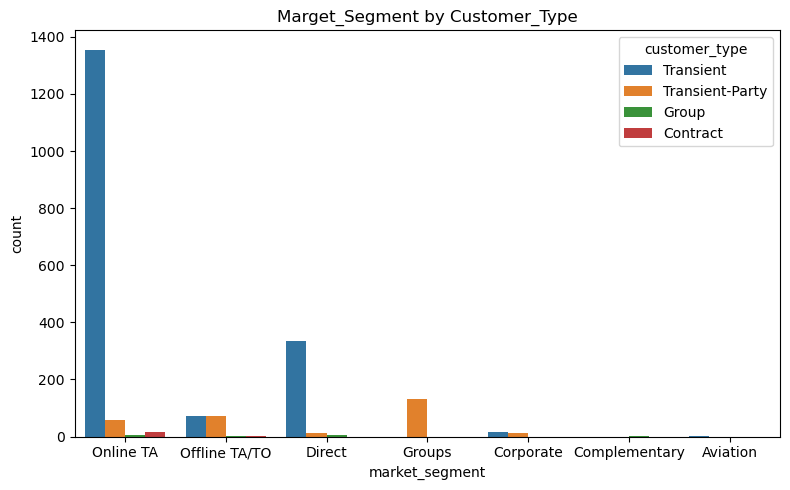

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(x='market_segment',hue='customer_type',data=df)
plt.title("Marget_Segment by Customer_Type")
plt.tight_layout()
plt.show()

INTERPRETATIONS :
  Online Ta has the most effective for customer transient & contract and for direct maarketing is most effective for transient party customer. Group customer have similar in online TA and direct marketing channels

TASK 4 - 3

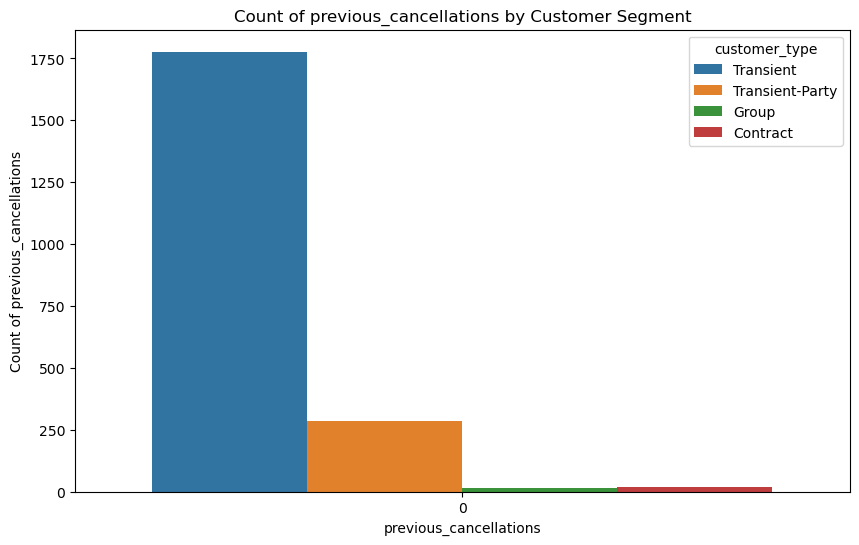

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(hue='customer_type',x='previous_cancellations', data=df)
plt.title('Count of previous_cancellations by Customer Segment')
plt.xlabel('previous_cancellations')
plt.ylabel('Count of previous_cancellations')
plt.show()

INTERPRETATION :
  Mostly we need to focus on complementary & aviations so they will get more customer through that channels, overly we need more focus on customer satisfacion, on customer transient type because more no of cancelation done by this type of customers

TASK 5 -1

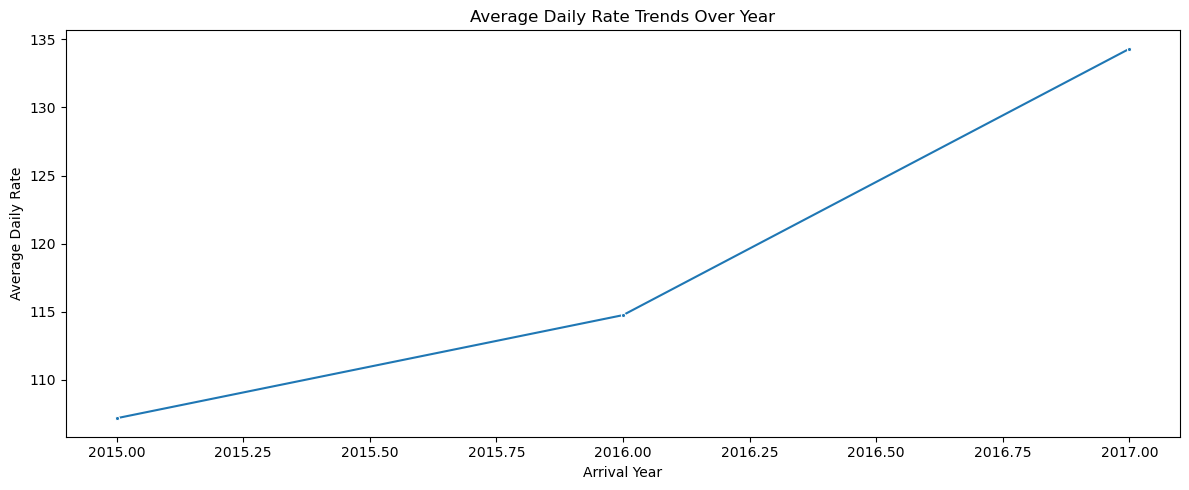

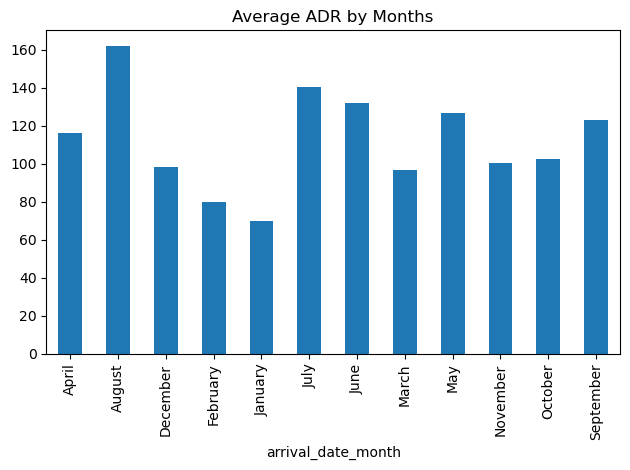

In [91]:
avg = df.groupby("arrival_date_year")['adr'].mean().reset_index(name='adr')
plt.figure(figsize=(12, 5))
sns.lineplot(x='arrival_date_year', y='adr', data=avg, marker='.')
plt.title("Average Daily Rate Trends Over Year") 
plt.xlabel('Arrival Year')
plt.ylabel('Average Daily Rate')

plt.tight_layout()
plt.show()

gp = df.groupby("arrival_date_month")['adr'].mean().plot(kind='bar')
plt.title("Average ADR by Months")

plt.tight_layout()
plt.show()

INTERPRETATION :
  The average adr rate is increasing over years, Average adr is high in august month, where as in January adr is low

TASK 5 -2

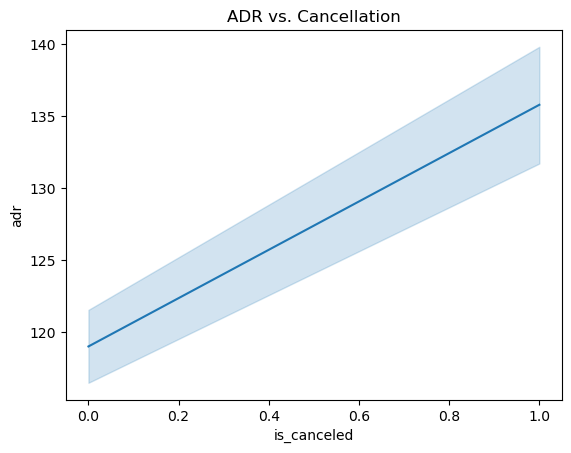

In [95]:
sns.lineplot(y='adr', x='is_canceled', data=df)
plt.title('ADR vs. Cancellation')
plt.show()

Interpretation:

From this chart we can came to know that ADR is increasing when the customers cancelling the booking increases,So from when we give excellent hospitality and good customer statisfication and with affortable price with good ambitience the booking will increases form that we can maximize the pricing.

TASK 5 - 3

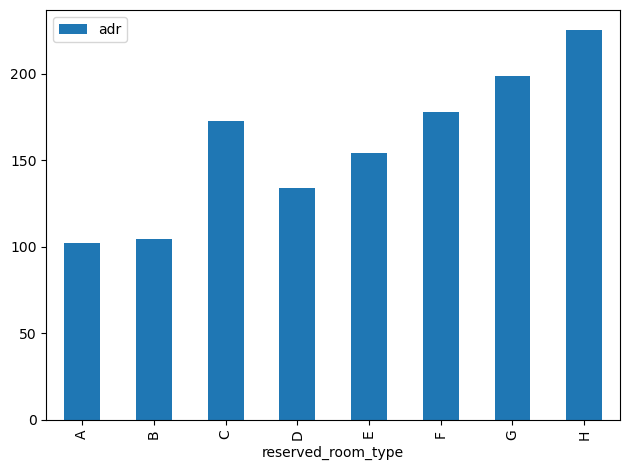

In [99]:
hb=df.groupby(['reserved_room_type'])[['adr']].mean().plot(kind='bar')
plt.tight_layout()
plt.show()

Interpretations :
 The Reserved room type H has the highest average adr rate.

TASK 6-1

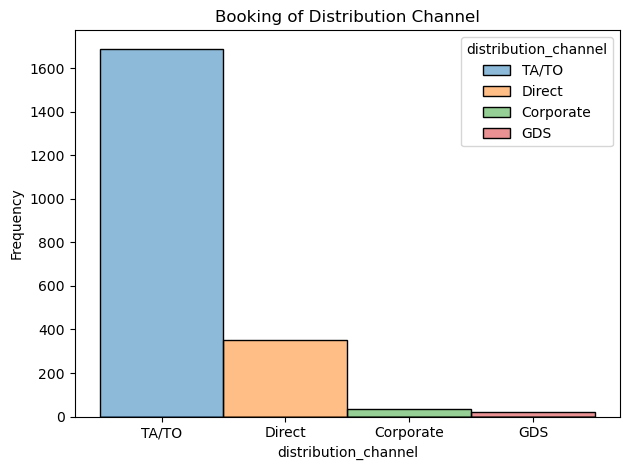

In [103]:
sns.histplot(x='distribution_channel',kde=True,hue='distribution_channel',data=df)
plt.title("Booking of Distribution Channel")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Interpretations:

The majority of bookings are made through the TA/TO channel, while Corporate and GDS channels have significantly lower usage.

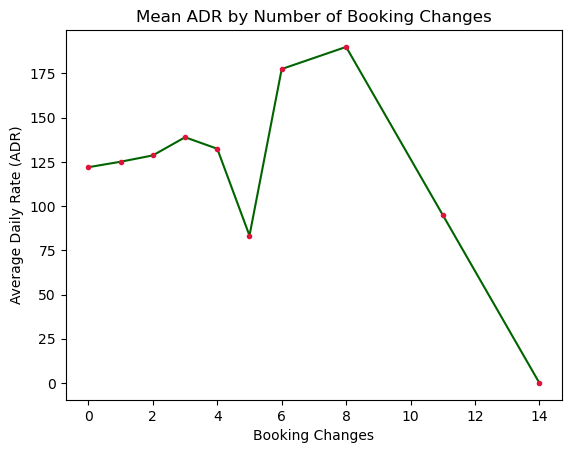

In [106]:
bca=df.groupby('booking_changes')['adr'].mean().plot(kind='line',color='darkgreen',marker='.',mec='crimson',mfc='crimson')
plt.xlabel('Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Mean ADR by Number of Booking Changes')
plt.show()


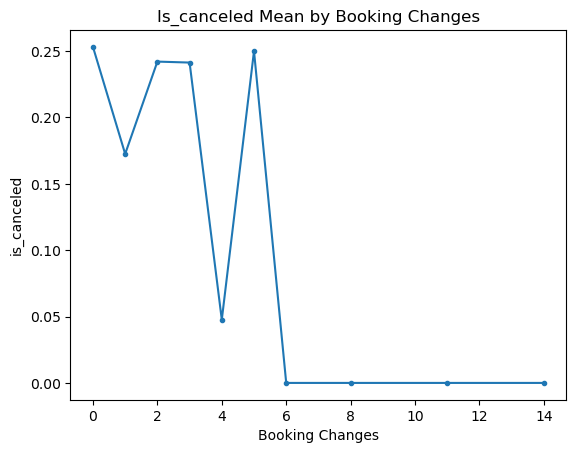

In [108]:
bcc=df.groupby('booking_changes')['is_canceled'].mean().plot(kind='line',marker='.')
plt.xlabel('Booking Changes')
plt.ylabel('is_canceled')
plt.gca()
plt.title('Is_canceled Mean by Booking Changes')
plt.show()

Interpretations:

The Booking changes 6 to 14 maded customers didn't cancel the booking oft he hostel,This shows that who are all made many changes were statisfied with the hotel

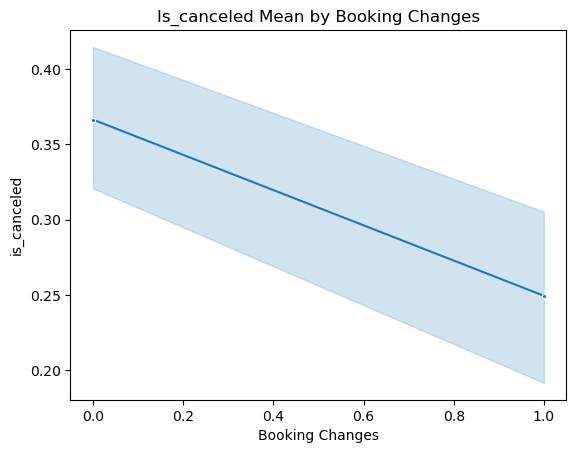

In [113]:
sns.lineplot(x='is_canceled',y='booking_changes',data=df,marker='.')
plt.xlabel('Booking Changes')
plt.ylabel('is_canceled')
plt.title('Is_canceled Mean by Booking Changes')
plt.show()

TASK 6 -3

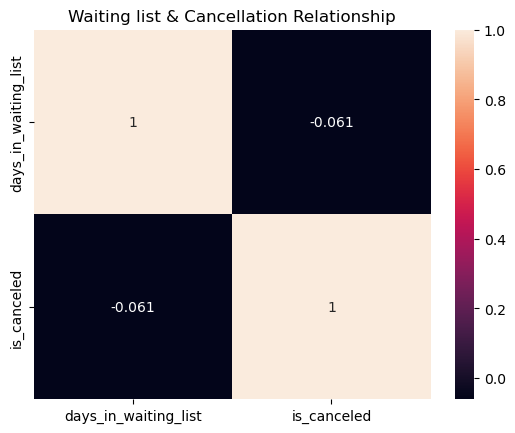

In [116]:
cr=df[['days_in_waiting_list','is_canceled']].corr()
cr
sns.heatmap(cr,annot=True)
plt.title("Waiting list & Cancellation Relationship")
plt.show()

Interpretations :
The correlation between waiting list & cacncellation turn up in negative, Hence it shows moderate negative relationship between them

TASK 7 - 1

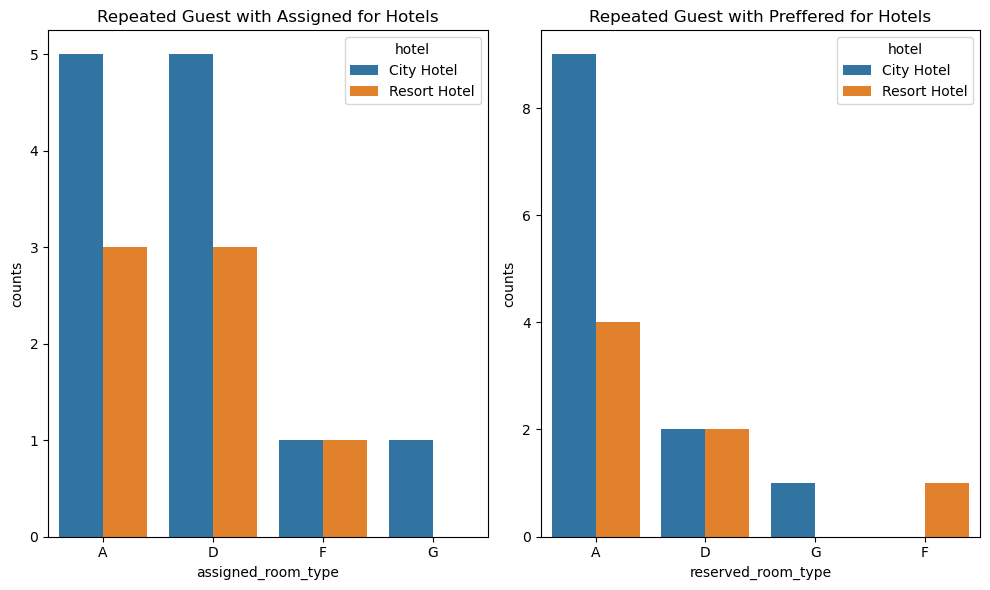

In [120]:
repeated=df[df['is_repeated_guest']==1]
gp7=repeated.groupby(['hotel','assigned_room_type'])['is_repeated_guest'].count().reset_index(name='counts')
gp=repeated.groupby(['hotel','reserved_room_type'])['is_repeated_guest'].count().reset_index(name='counts')
#ploting
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.barplot(x='assigned_room_type',y='counts',hue='hotel',data=gp7,ax=ax[0])
ax[0].set_title("Repeated Guest with Assigned for Hotels")
ax[0]
sns.barplot(x='reserved_room_type',y='counts',hue='hotel',data=gp,ax=ax[1])
ax[1].set_title("Repeated Guest with Preffered for Hotels")
ax[1]
plt.tight_layout()
plt.show()

 Interpretations:
Mostly repeated guest prefered the city hotels in which the room type A has been the msot prefered and it was assigned to the guest. So the customer statification level increases.

TASK 7 - 2

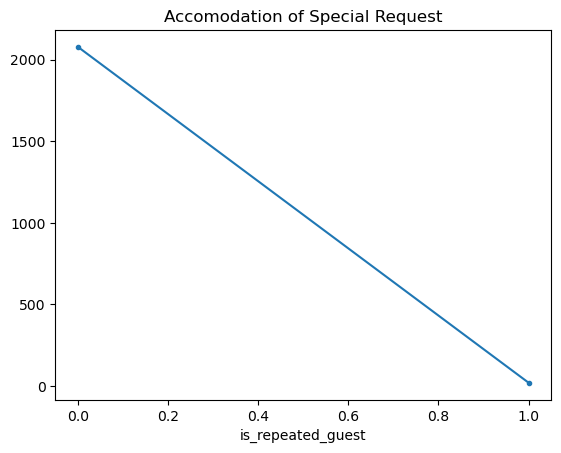

In [124]:
gp2=df.groupby('is_repeated_guest')['total_of_special_requests'].count().plot(kind='line',marker='.')
plt.title("Accomodation of Special Request")
plt.gca()
plt.show()

Interpretations :
The special request made by the customer is not successfully accomodated or provide by the hotel management, So from this ,I came to know that loyalty program is unsuccessful for accomodations of special request by hotel management

TASK 7 - 3

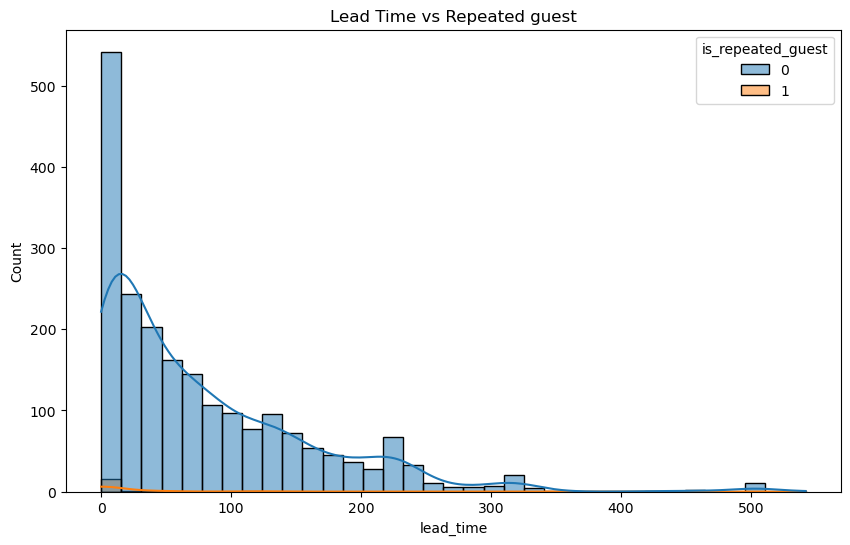

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(x='lead_time',hue='is_repeated_guest',data=df,kde=True)
plt.title("Lead Time vs Repeated guest")
plt.show()

Interpretations:
The factors contribute to repeat the guest is depends on customer satisfication, meals,Lead time,Assigned room type,deposit type etc...Mainlly deponds on the hospitality of the hotels. If the hospitality is excellent it encourage the guest to stay again in hotel.

# PROJECT 2

TASK 1 - 1

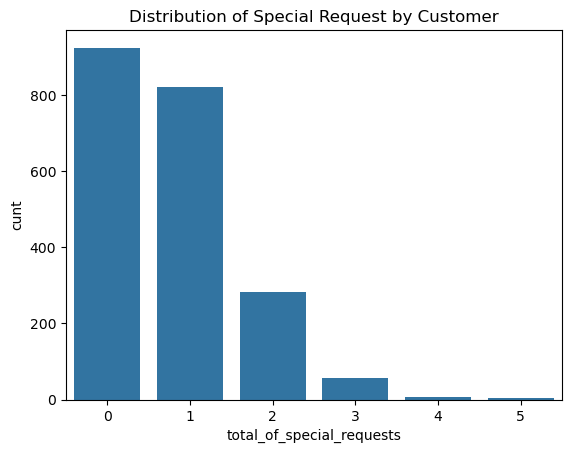

In [135]:
gtsp=df.groupby('total_of_special_requests')['total_of_special_requests'].count().reset_index(name='cunt')
#sb.countplot(x='total_of_special_requests',data=hb)
sns.barplot(x='total_of_special_requests',y='cunt',data=gtsp)
plt.title("Distribution of Special Request by Customer")
plt.show()

Interpretations - O special_requests has the higher distribution rather than remaining special request made by the customers

TASK 1 - 2

The relation ship between total special request and adr is 0.11470414743768993


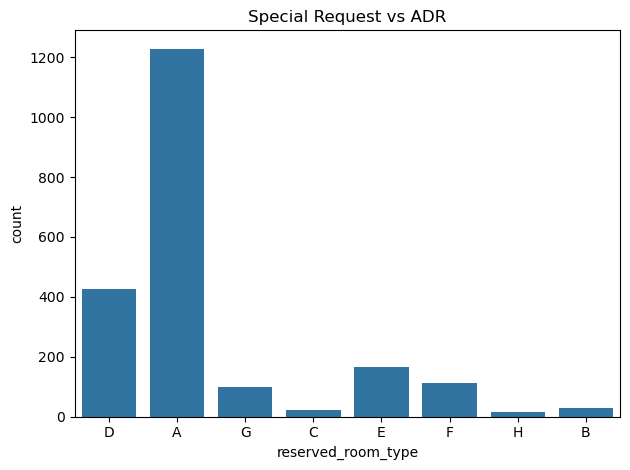

In [139]:
c=df['total_of_special_requests'].corr(df['adr'])
print("The relation ship between total special request and adr is",c)
sns.countplot(x='reserved_room_type',data=df)
plt.title("Special Request vs ADR")
plt.tight_layout()
plt.show()

Interpretations: The relationship between total special request and adr is moderate relationship, The room type A has the most preffered room type by the customers. 

In [142]:
def letter_to_number(letter):
    return ord(letter) - ord('A') + 1

# Apply the mapping function to the column
df['reserved_room_type'] = df['reserved_room_type'].apply(letter_to_number)

In [146]:
df['reserved_room_type']

0       4
1       1
2       7
3       3
4       7
       ..
2092    4
2093    4
2094    1
2095    1
2096    4
Name: reserved_room_type, Length: 2097, dtype: int64

TASK 1 - 2

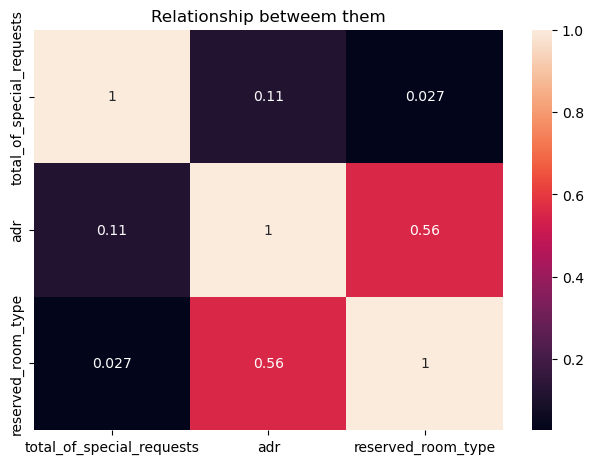

In [149]:
cs=df[['total_of_special_requests','adr','reserved_room_type']].corr()
sns.heatmap(cs,annot=True)
plt.title("Relationship betweem them")
plt.tight_layout()
plt.show()

Interpretations - The relationship between adr & special request is 0.11 and adr & reserved room type is 0.5, Hence both have moderate positive relationship

TASK 2 -1

In [155]:
ic=df[df['is_canceled']==0]
ic

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


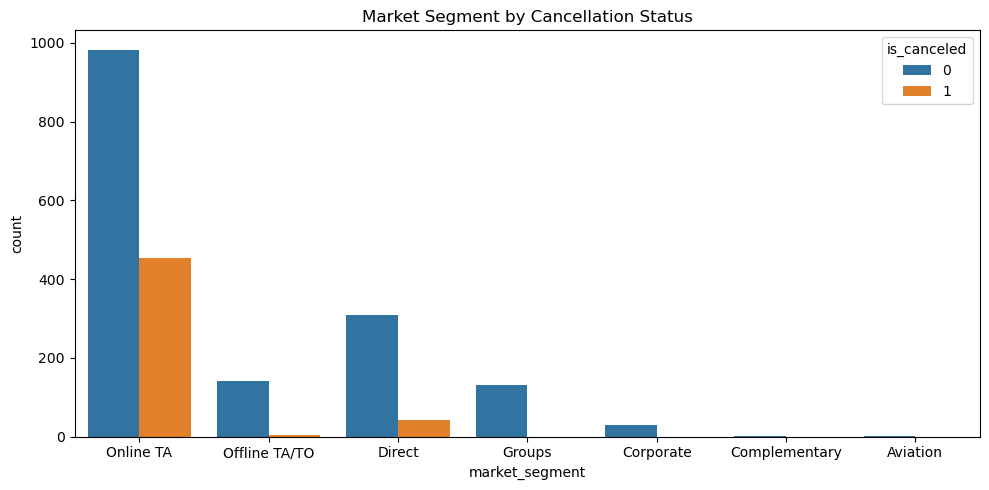

In [159]:
plt.figure(figsize=(10, 5))
df['is_canceled'] = df['is_canceled'].astype(str)
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title("Market Segment by Cancellation Status")  
plt.tight_layout()
plt.show()

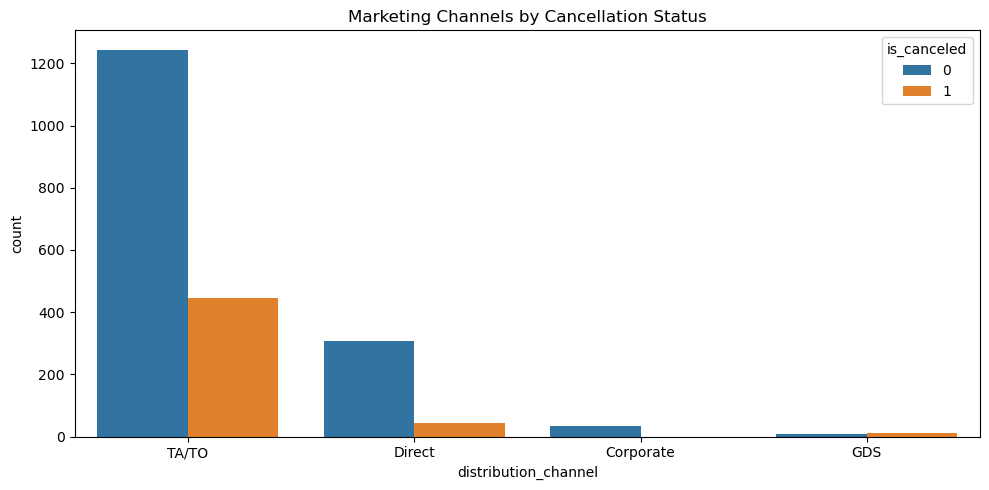

In [161]:
plt.figure(figsize=(10, 5))
df['is_canceled'] = df['is_canceled'].astype(str)
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.title("Marketing Channels by Cancellation Status")
plt.tight_layout()
plt.show()

Interpretations- Online TA has the most successfull and more contributing for hotel booking.  followed by Direct margeting segment.

TASK 2 - 2

                           total_of_special_requests       adr  is_canceled  \
total_of_special_requests                   1.000000  0.114704    -0.144737   
adr                                         0.114704  1.000000     0.138885   
is_canceled                                -0.144737  0.138885     1.000000   
arrival_date_year                           0.112196  0.198320     0.177728   
stays_in_weekend_nights                    -0.026950 -0.055188     0.082658   
adults                                      0.102525  0.300195     0.072950   
lead_time                                   0.120182 -0.090323     0.139926   
days_in_waiting_list                       -0.008629 -0.104352    -0.060892   
is_repeated_guest                          -0.003239 -0.046521    -0.041772   

                           arrival_date_year  stays_in_weekend_nights  \
total_of_special_requests           0.112196                -0.026950   
adr                                 0.198320                -0.

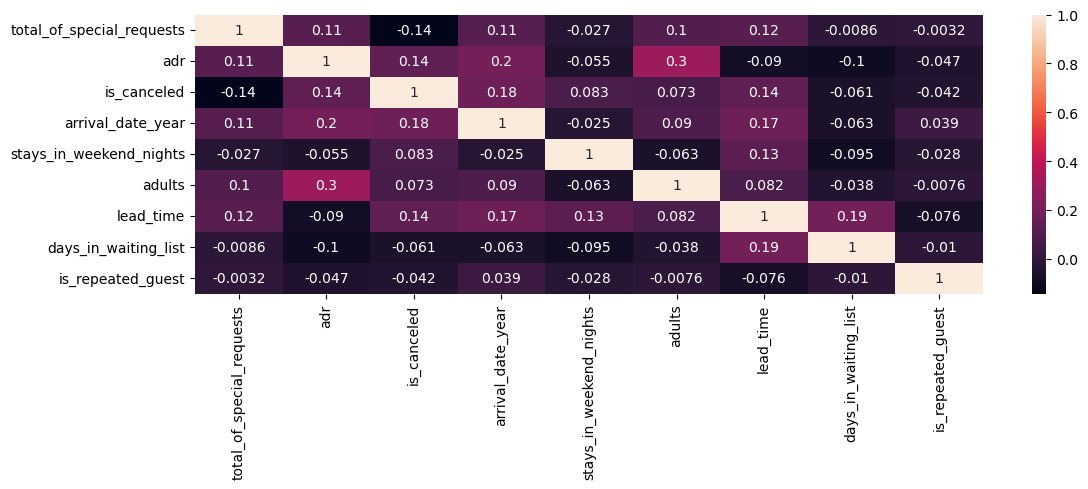

In [166]:
cs=df[['total_of_special_requests','adr','is_canceled','arrival_date_year','stays_in_weekend_nights',
       'adults','lead_time','days_in_waiting_list','is_repeated_guest']].corr()
print(cs)
plt.figure(figsize=(12,5))
sns.heatmap(cs,annot=True)
plt.tight_layout()
plt.show()

TASK 2 -3

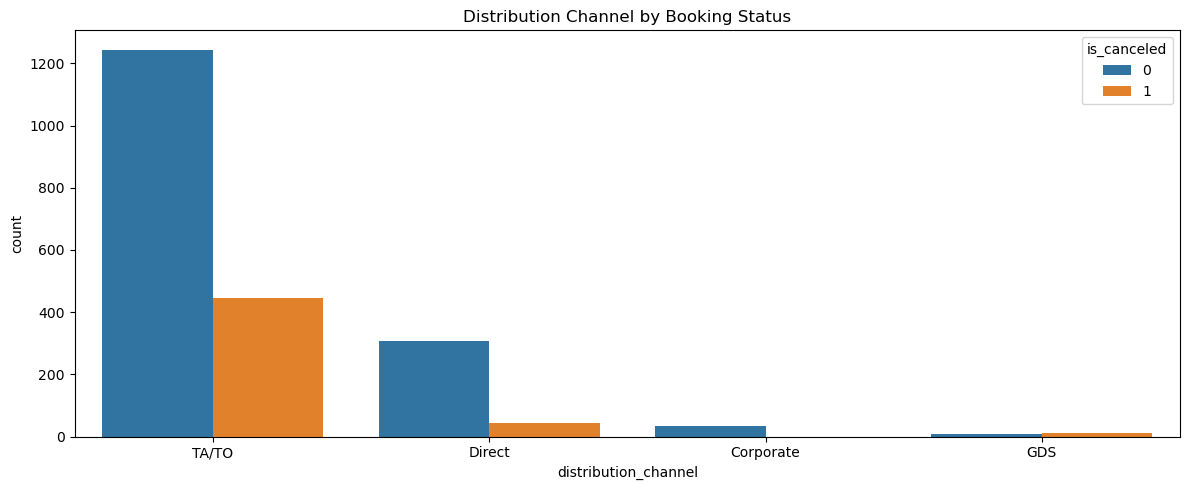

In [169]:
plt.figure(figsize=(12,5))
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.title("Distribution Channel by Booking Status")
plt.tight_layout()
plt.show()

Interpretations - Travel agent or tourist operator bring high number of customers to hotel